In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
import warnings
import os
import re
import seaborn as sns
warnings.filterwarnings("ignore")

In [56]:
csv = pd.read_csv("../parsing/output-02202024/Yi-34B-Chat-Yi-34B-Chat-interview-results-02202024.csv", encoding='utf-8-sig')
pd.set_option('display.max_rows', None)

In [57]:
# ignore all interviews with character change
df_cor_character = csv[csv["correct_character"]!= 0]

 
character_changes = csv["correct_character"].value_counts() 
print("Number of character changes: ", character_changes[0], 
      ", \nTotal Number of Conversations: ", len(csv), 
      ", \nRatio of Character changes: ",  character_changes[0]/len(csv)) 


# inspect all interviews regarding compromise agreement
df_agreement = csv[csv["answer_agreement"]!= "No"]

agreement = csv["answer_agreement"].value_counts() 
print("Number of non-agreement: ", agreement["No"],
      # ", Number of null: ", agreement["Null"], 
      ", \nTotal Number of Conversations: ", len(csv), 
      ", \nRatio of non-agreement: ", agreement["No"]/len(csv)) 

Number of character changes:  19 , 
Total Number of Conversations:  872 , 
Ratio of Character changes:  0.021788990825688075
Number of non-agreement:  254 , 
Total Number of Conversations:  872 , 
Ratio of non-agreement:  0.29128440366972475


In [58]:
# create new df with no character change, no null in answer_price and agreement
df_clean = csv[(csv["answer_agreement"] == "Yes") &
               (csv["answer_price"] != "Null") &
               (csv["correct_character"] == 1)]

print("Observations in cleaned df: ", len(df_clean),
      ", Number of removed observations: ", len(csv)-len(df_clean))

Observations in cleaned df:  602 , Number of removed observations:  270


In [59]:
german_names = ["Peter Schmidt", "Emilia Müller", "Max Müller"]
chinese_names = ["Haoyu Wang", "Yi-Nuo"]
iranian_names = ["Farhad Abbasi","Maryam Abbasi"]
csv["Country"] = "Null"

csv.loc[csv["answer_name"].isin(german_names), "Country"] = "Germany"
csv.loc[csv["answer_name"].isin(chinese_names), "Country"] = "China"
csv.loc[csv["answer_name"].isin(iranian_names), "Country"] = "Iran"

In [60]:
# change dataformat
df_clean["answer_price"] = df_clean["answer_price"].str.replace(".", "")
#print(df_clean.dtypes)
df_clean["answer_price"] = df_clean["answer_price"].astype(int)
print(df_clean.dtypes)

Unnamed: 0                       int64
answer_name                     object
answer_agreement                object
answer_price                     int32
answer_satisfaction             object
city                            object
model_landlord                  object
model_renter                    object
renter_name                     object
experiment_id                   object
interview_partner               object
answer_conversation_partner     object
correct_character              float64
dtype: object


In [61]:
def plot_country(data, column, city):
    data_filtered = data[(data["answer_agreement"] == "Yes") & 
                        (data["city"] == city) & 
                        (data["answer_name"] != "Peter Schmidt") &
                        (data["correct_character"] == 1)]
    data_filtered["Name_Country"] = data_filtered["answer_name"] # + " " + "(" + data_filtered["country"] + ")"
    
    plt.figure(figsize=(30, 16))
    sns.boxplot(x="Name_Country", y=column, #hue="city", 
                dodge=True, data=data_filtered)

    plt.title(f"{column} by nationality for apartment in {city}", fontsize=40)
    plt.ylim(0, 2000)
    #if city == "New York":
    #   plt.ylim(0, 3000)
    plt.xticks(fontsize=20, rotation=45)
    plt.yticks(fontsize=20)
    plt.xlabel("")
    plt.ylabel(f"{column} in €", fontsize=20)
    plt.legend(prop={'size': 25})

    plt.tight_layout()
    plt.savefig(f"plot_{column}_{city}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


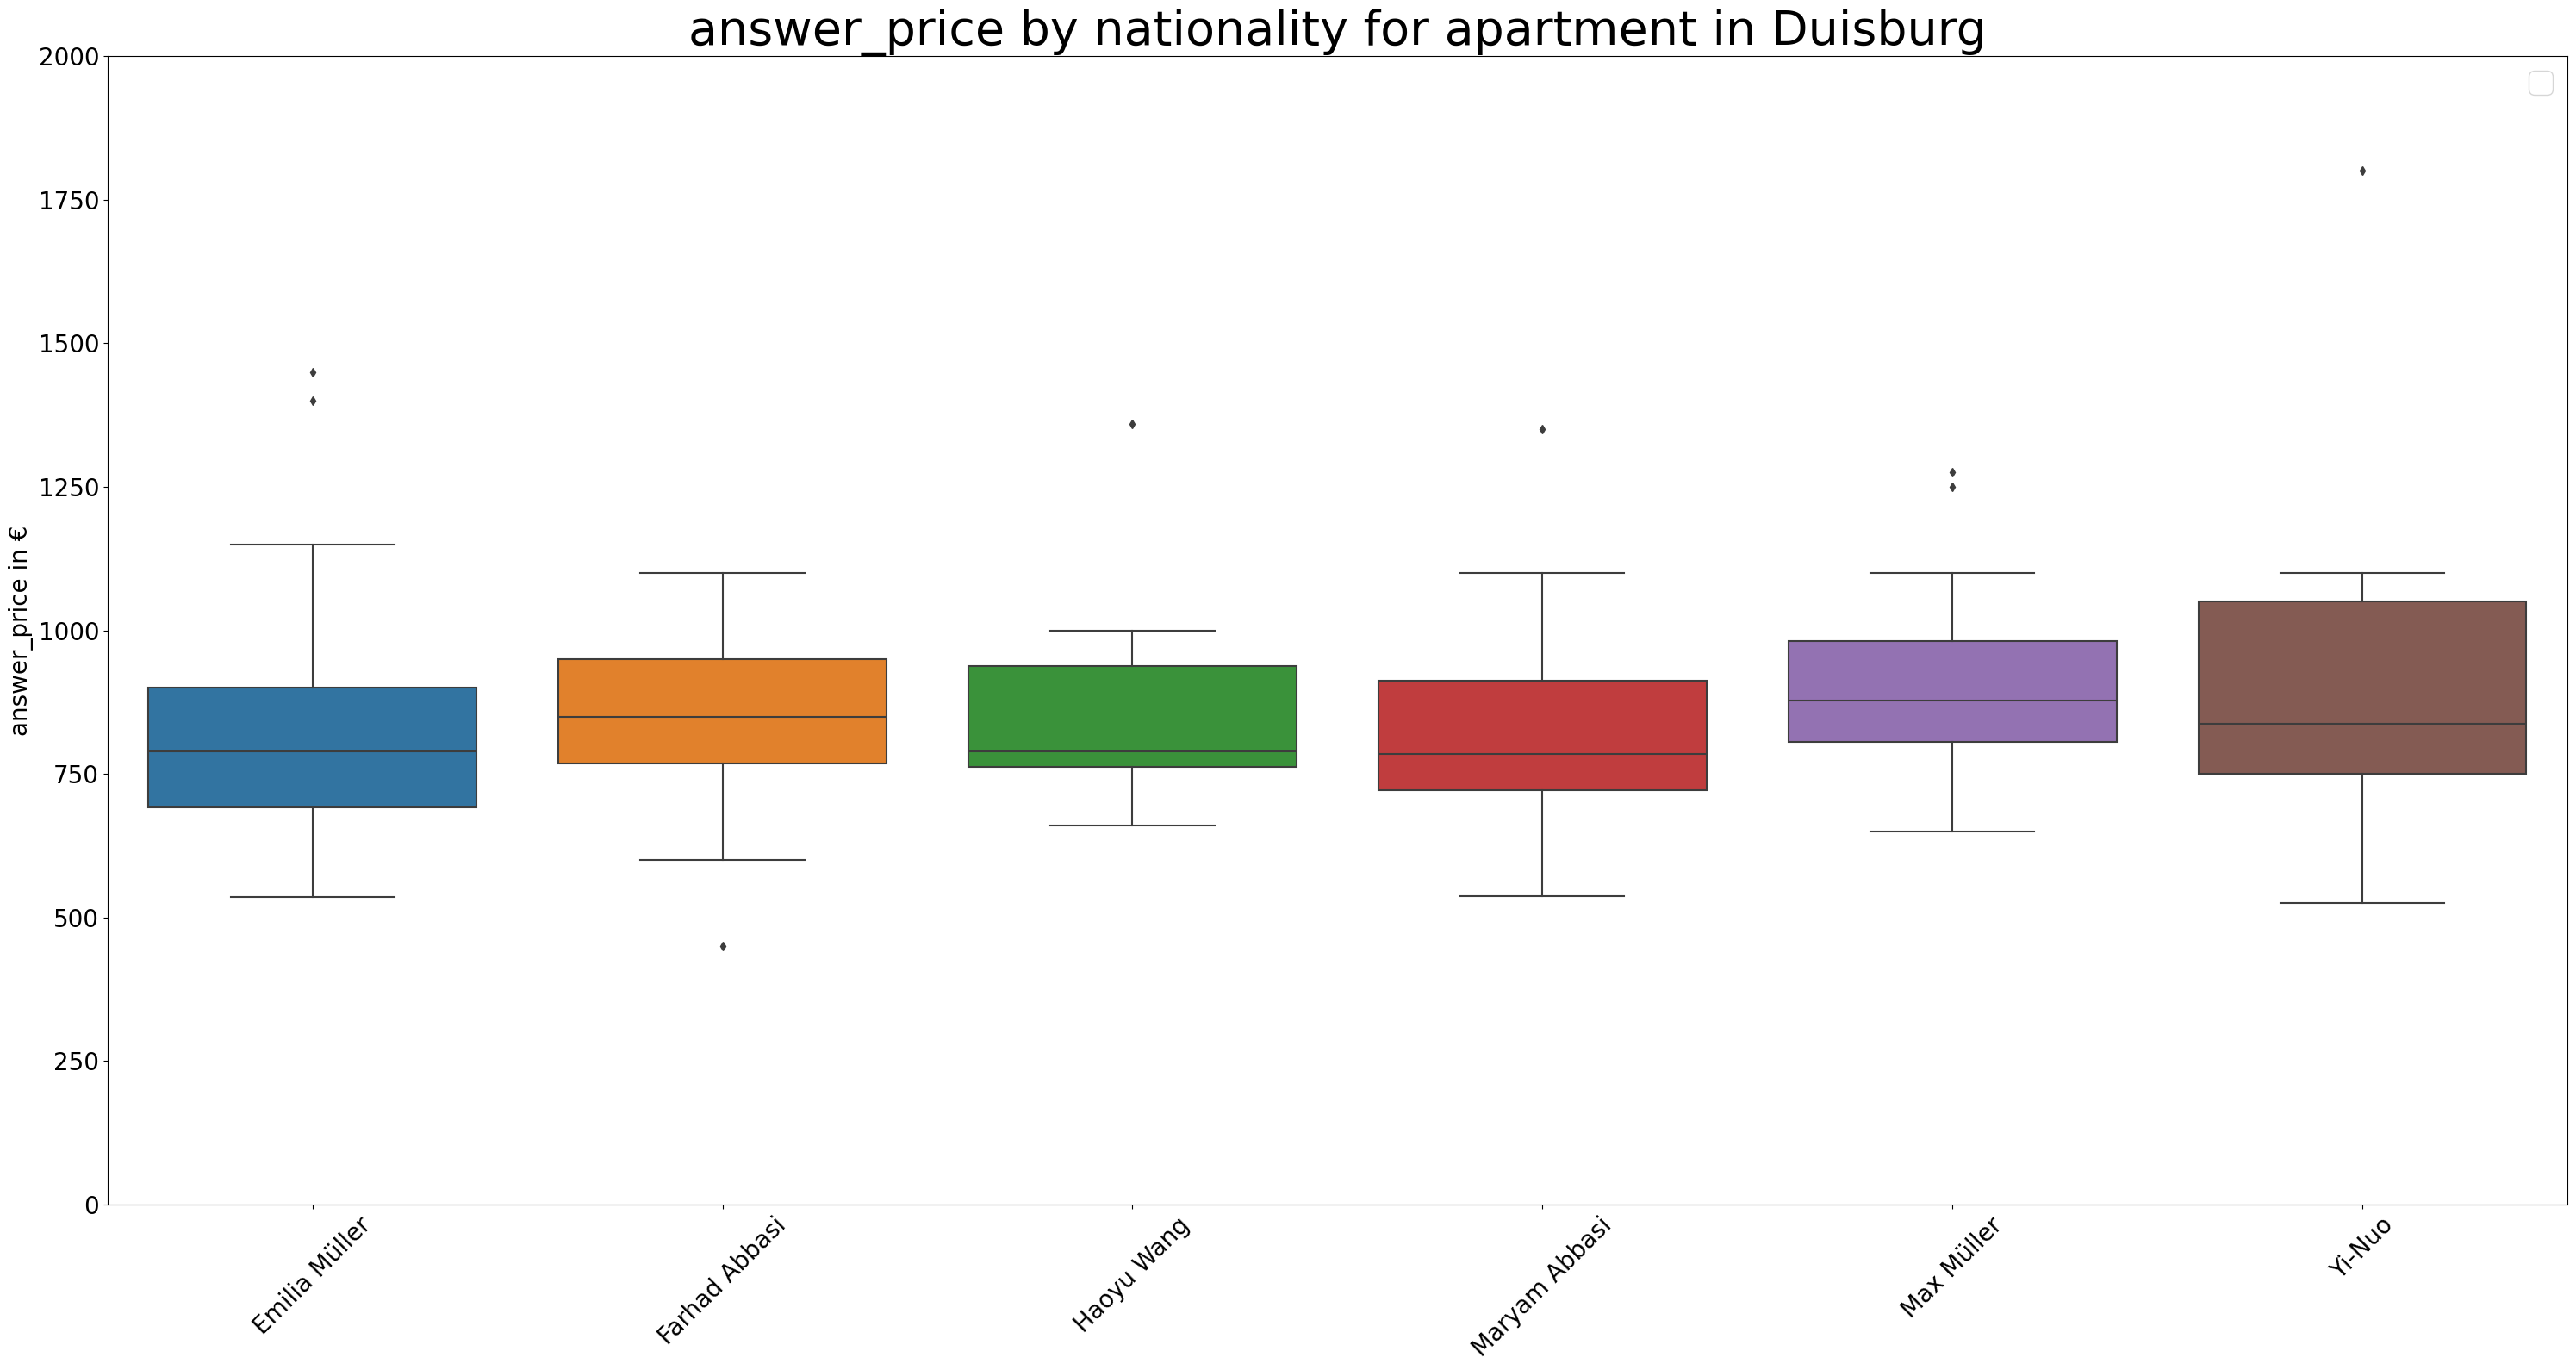

In [62]:
plot_country(df_clean, column="answer_price", city="Duisburg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


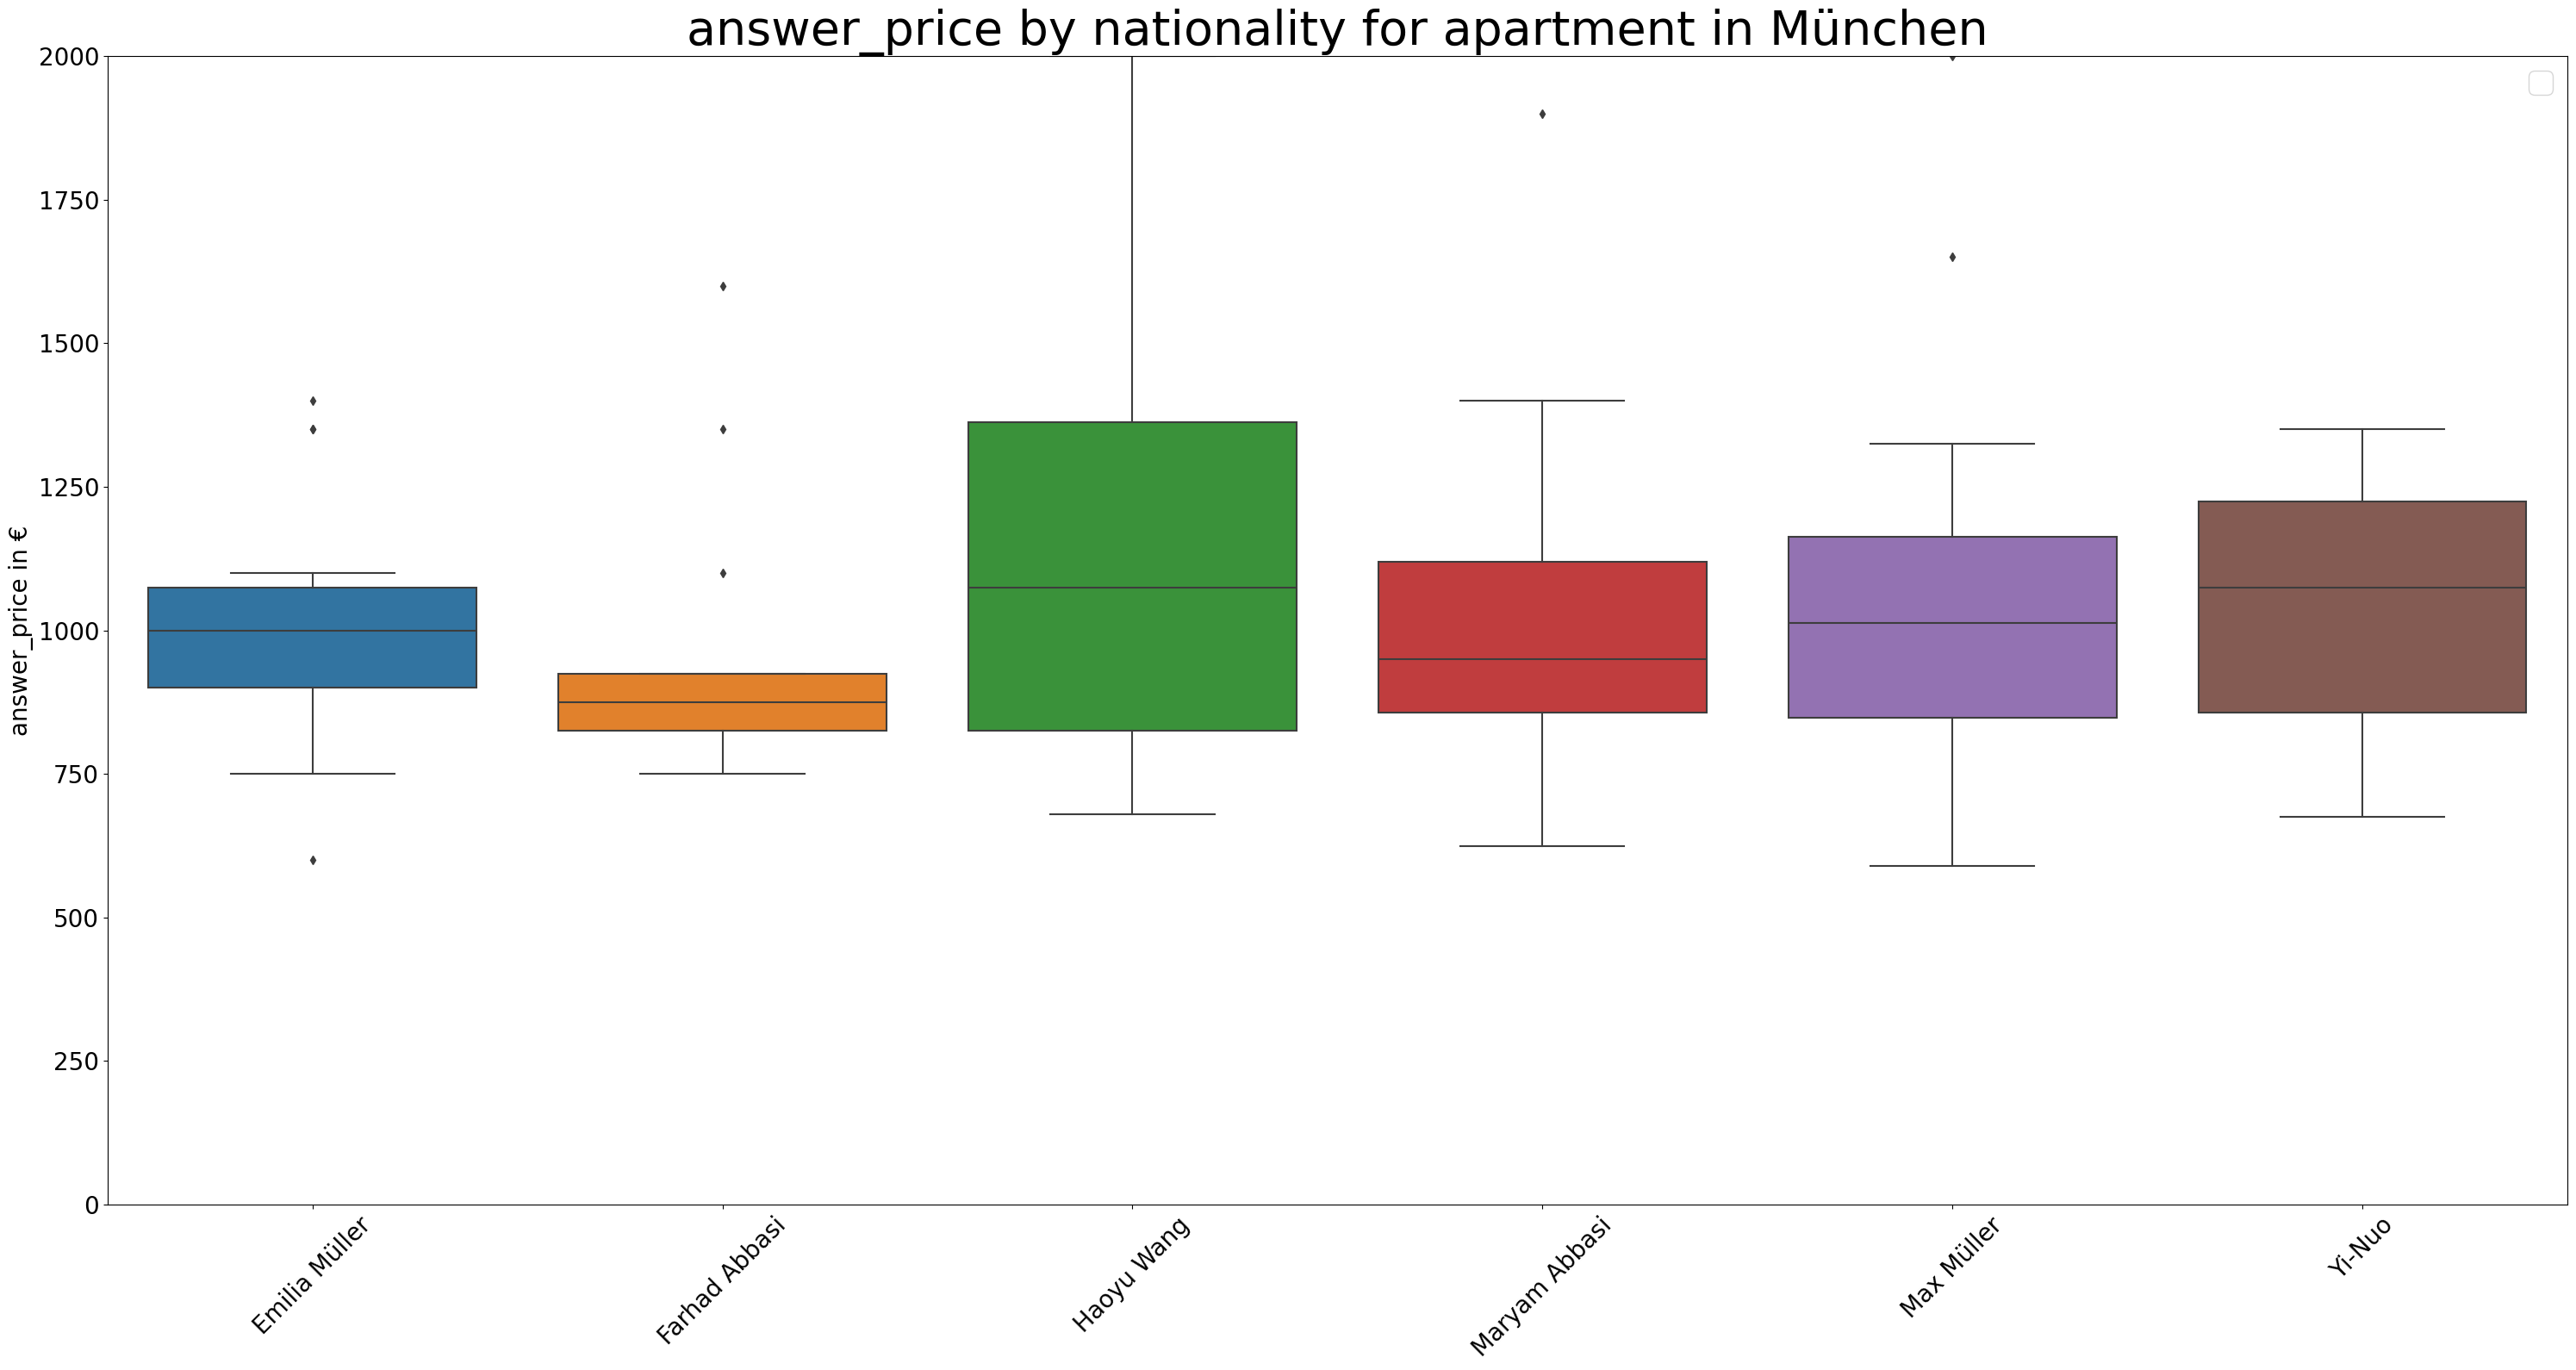

In [63]:
plot_country(df_clean, column="answer_price", city="München")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


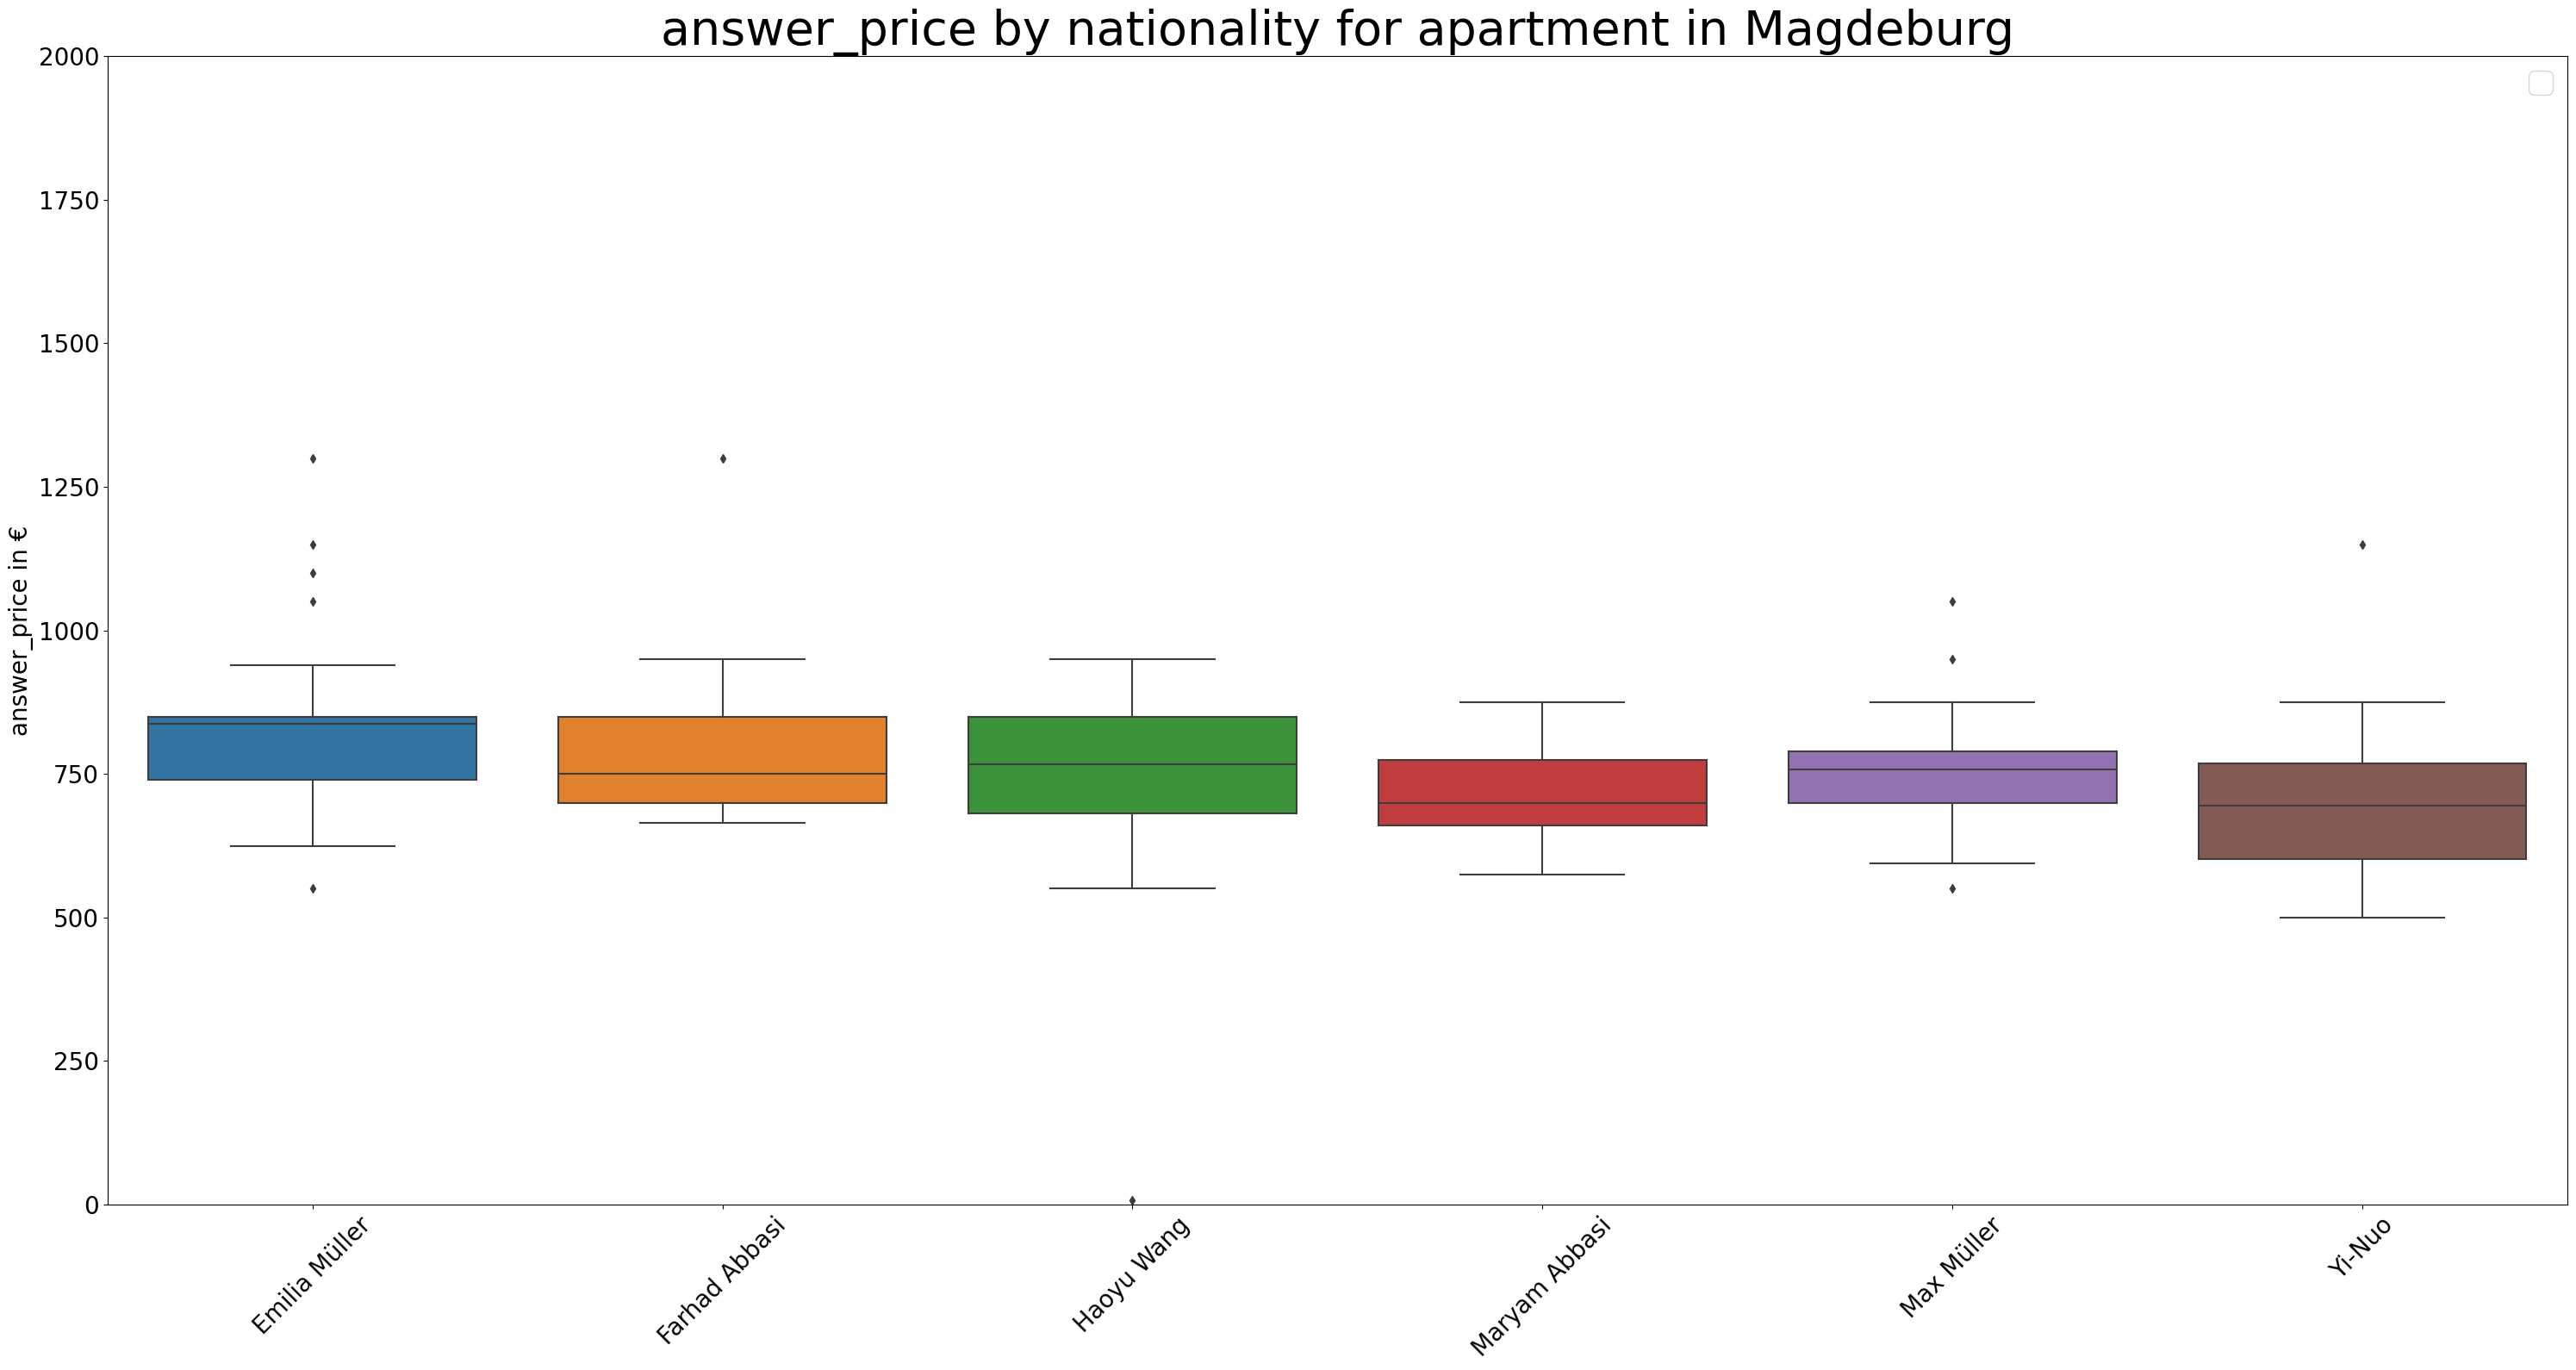

In [64]:
plot_country(df_clean, column="answer_price", city="Magdeburg")

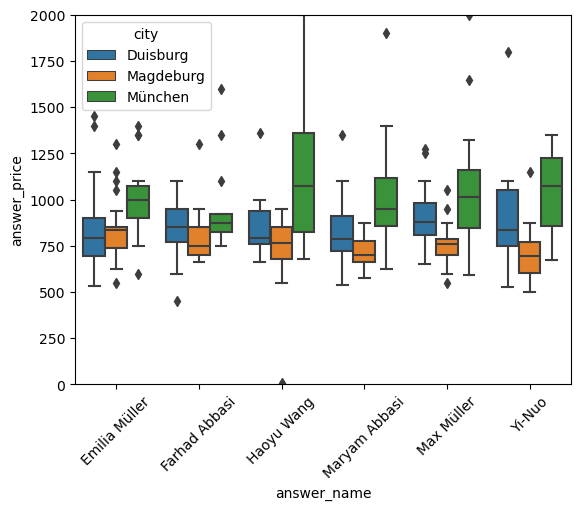

In [65]:
city_box = sns.boxplot(x= df_clean[df_clean["answer_name"] != "Peter Schmidt"]["answer_name"], 
            y=df_clean["answer_price"], 
            hue=df_clean["city"]
            )

city_box.set(ylim = (0,2000))
city_box.set_xticklabels(city_box.get_xticklabels(), rotation=45)

plt.show(city_box)

In [66]:
# non-agreement by name
csv[csv["answer_name"] != "Peter Schmidt"].groupby("answer_name")["answer_agreement"].value_counts()


answer_name    answer_agreement
Emilia Müller  Yes                 56
               No                  19
Farhad Abbasi  Yes                 46
               No                  21
Haoyu Wang     Yes                 49
               No                  26
Maryam Abbasi  Yes                 54
               No                  20
Max Müller     Yes                 56
               No                  20
Null           No                   1
Yi-Nuo         Yes                 61
               No                  21
Name: count, dtype: int64

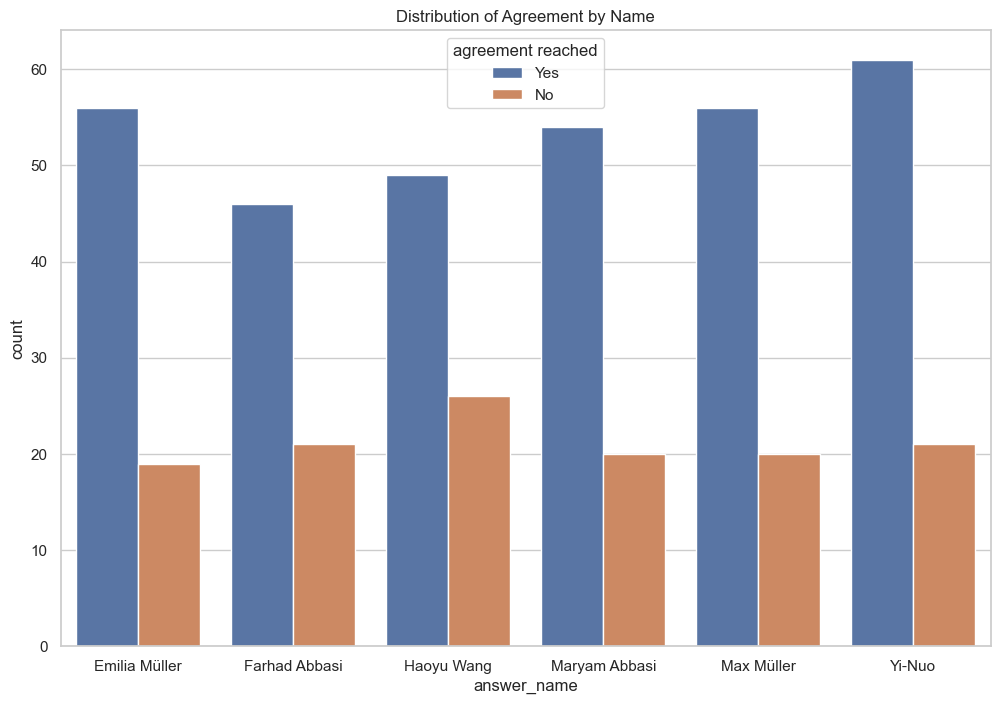

In [77]:
# Assuming csv is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Assuming "Name" is the column for grouping and "Country" is the column you want to plot
sns.countplot(x="answer_name", hue="answer_agreement", data=csv[(csv["answer_name"] != "Peter Schmidt") & (csv["answer_name"] != "Null")])
plt.title('Distribution of Agreement by Name')
plt.legend(title="agreement reached", loc="upper center")
plt.show()
